# 1. Latar Belakang

Airbnb menjadi salah satu platform akomodasi terbesar di dunia dengan ribuan listing tersedia di setiap kota besar, termasuk Bangkok. Kota ini memiliki karakteristik yang unik karena:
- pusat kota yang padat,
- jaringan transportasi umum yang sangat berpengaruh pada mobilitas wisatawan (BTS, MRT),
- banyaknya destinasi wisata populer seperti Grand Palace dan Chatuchak Market.

Bagi pemilik properti, lokasi merupakan faktor utama yang dipertimbangkan dalam menentukan harga, potensi booking, dan strategi pemasaran listing. Namun, tidak semua pemilik memiliki pemahaman yang jelas mengenai sejauh mana jarak terhadap pusat kota, transportasi umum, dan tempat wisata benar-benar memengaruhi performa listing mereka.

Dengan memahami pengaruh lokasi terhadap performa listing, pemilik dan calon host dapat:
- menetapkan harga yang lebih kompetitif,
- mengoptimalkan strategi listing,
- meningkatkan tingkat hunian,
- dan memaksimalkan pendapatan.

Dataset Airbnb Listings Bangkok memberikan kesempatan untuk menganalisis faktor lokasi dan melihat apakah benar lokasi memberikan dampak signifikan pada performa listing, yang dapat diukur melalui harga, jumlah review, review per bulan, hingga tingkat ketersediaan.

# 2. Pernyataan Masalah

Untuk menjawab business problem “Bagaimana pengaruh jarak ke pusat kota, transportasi umum, dan destinasi wisata terhadap performa listing Airbnb di Bangkok?”, pertanyaan ini dipecah menjadi tiga analisis utama:

1. Pengaruh Jarak ke Pusat Kota
- Apakah listing yang lebih dekat ke pusat kota memiliki harga lebih tinggi?
- Apakah listing dekat pusat kota memiliki jumlah review dan review per month yang lebih besar?

2. Pengaruh Akses Transportasi Umum (BTS/MRT)
- Apakah listing yang dekat dengan BTS atau MRT memiliki harga lebih tinggi?
- Apakah listing dekat transportasi umum memiliki performa lebih baik (lebih banyak review, booking rate lebih tinggi)?

3. Pengaruh Jarak ke Destinasi Wisata
- Apakah listing dekat tempat wisata populer memiliki harga lebih tinggi?
- Apakah listing dekat destinasi wisata memiliki lebih banyak review?

# 3. Load Data & Data Understanding

Sebelum melakukan analisis, kita perlu memahami dataset melalui tahap data understanding. Tahap ini membantu mengidentifikasi anomali atau masalah dalam data yang nantinya harus diperbaiki pada data cleaning. Setiap perbaikan akan disertai justifikasi berdasarkan domain knowledge dan pertimbangan statistik.

Pertama, mari kita tampilkan informasi dasar dari dataset Airbnb Listings Bangkok.

Dataset ini berisi informasi terkait listing dari akomodasi penginapan di kota Bangkok yang terdaftar di Airbnb.
Terdapat 17 kolom di dalam datases Airbnb Listings Bangkok, yaitu:

- Unnamed:0 : index tambahan dataset
- id : id unik tiap listing
- name : nama dari listing tersebut
- host_id : id unik host listing
- host_name : nama dari listing tersebut
- neighbourhood : nama daerah/distrik listing tersebut berada
- latitude : koordinat lintang lokasi listing
- longitude : koordinat bujur lokasi listing
- room_type : tipe kamar listing
- price : harga listing dalam satuan Baht (THB)
- minimum_nights : jumlah minimum malam untuk booking
- number_of_reviews : jumlah review pada listing
- last_review : tanggal review terakhir
- reviews_per_month : average review pada listing
- calculated_host_listings_count : jumlah listing yang dimiliki host tersebut
- availability_365 : jumlah hari available pada listing dalam satu tahun
- number_of_reviews_ltm : jumlah review dalam 12 bulan terakhir


In [1]:
# import library yang akan digunakan untuk analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from scipy.stats import spearmanr, mannwhitneyu, kruskal
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df_raw.head(),df_raw.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
# copy dataframe agar yang asli tidak berubah saat proses cleaning
df = df_raw.copy()

In [4]:
# jumlah baris dan kolom
df.shape

(15854, 17)

In [5]:
# info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [6]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [7]:
df[df.duplicated(keep=False)]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


tidak ada data yang duplicate

In [8]:
# cek missing value
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Dari proses data understanding ini dapat kita lihat bahwa:
- dataset Airbnb Listings Bangkok memiliki `15854` baris dan `17` kolom
- terdapat missing value yang diwakili dengan value NaN pada kolom `name`, `host_name`, `last_review`, `reviews_per_month`.
- kolom yang perlu dihapus adalah `id`, `host_id`, `host_name`, `last_review`, `number_of_reviews_ltm`, `calculated_host_listings_count` karena tidak digunakan atau tidak relevan untuk spatial analysis


# 4. Data Cleaning

## 4.1. Missing Value

In [10]:
# cek persentase missing value
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

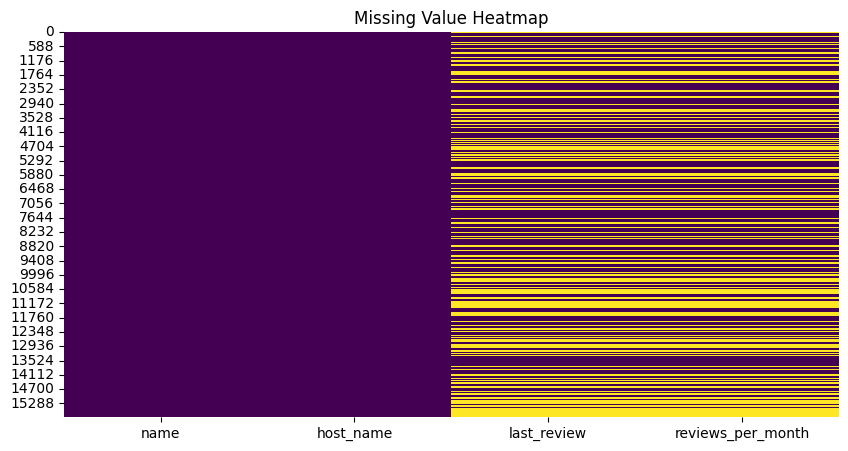

In [11]:
# menampilkan heatmap missing value menggunakan lib seaborn
plt.figure(figsize=(10,5))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

Berdasarkan heatmap di atas:

- pada kolom `name` dan `host_name` memiliki proporsi missing value yang sangat kecil, kurang dari 0.1%. kolom host_name sendiri tidak relevan dengan business problem sehingga aman untuk didrop
- pada kolom `last_review` dan `reviews_per_month` memiliki persentase missing value yang sama sebesar 36,5%. karena pola missingnya identik, dapat disimpulkan bahwa missing terjadi karena listing tersebut belum pernah mendapatkan review, bukan karena kesalahan pengumpulan data.

Oleh karena itu:

- kolom `last_review` tidak perlu lakukan imputasi dan akan didrop, karena kolom ini hanya berisi tanggal terakhir ulasan, bukan metrik performa tidak digunakan untuk menjawab business problem terkait lokasi, harga, dan permintaan mengisi tanggal fiktif justru berpotensi menyesatkan
- Missing pada `reviews_per_month` diisi dengan 0, karena listing tanpa review memang tidak memiliki frekuensi ulasan bulanan


pertama akan kita drop kolom yang tidak diperlukan sebelum masuk ke proses penanganan missing value

In [12]:
# kolom yang tidak relevan untuk analisis
df.drop(['Unnamed: 0','id', 'host_id', 'host_name', 'last_review', 'calculated_host_listings_count', 'number_of_reviews_ltm'], axis=1, inplace=True)

Berikut adalah kolom yang didrop dari dataset:
- Unnamed: 0 = index tambahan yang tidak penting
- id = Hanya id unik dam tidak punya nilai analitis
- host_id = id unik host dan idak digunakan untuk analisis lokasi maupun performa listing
- host_name = nama host tidak memiliki hubungan kausal dengan harga atau demand dan tidak dibutuhkan dalam EDA/proses statistik
- last_review = berisi tanggal teks (object) yang tidak relevan karena analisis kita tidak fokus pada time-series dam sudah ada metrik agregat seperti reviews_per_month yang jauh lebih informatif
- calculated_host_listings_count = mengukur jumlah properti yang dimiliki host. tidak relevan untuk fokus analisis lokasi karena bisa membingungkan
- number_of_reviews_ltm = redundant karena sudah ada reviews_per_month yang lebih representatif

In [13]:
# cek kolom pada dataset setelah dilakukan drop column
df.columns.tolist()

['name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365']

## 4.2. Imputasi missing value

In [14]:
# imputasi missing value pada kolom name
df['name'] = df['name'].fillna('No Name')
# imputasi missing value pada kolom reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


Untuk missing value pada kolom `name` karena missing value yang sangat sedikit & bukan variabel numerik maka saya isi dengan No Name dengan alasan menjaga data tetap konsisten tanpa menghapus baris dan menghindari masalah saat visualisasi atau pemanggilan text. Selanjutnya untuk kolom `reviews_per_month` karena `reviews_per_month` = 0 secara definisi berarti tidak ada aktivitas review, mengisi missing dengan 0 tidak menambah bias.

In [15]:
df.isna().sum()

name                 0
neighbourhood        0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
availability_365     0
dtype: int64

sekarang dapat dilihat sudah tidak ada missing value pada dataset

## 4.3. Perbaikan Tipe Data dan Typo

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               15854 non-null  object 
 1   neighbourhood      15854 non-null  object 
 2   latitude           15854 non-null  float64
 3   longitude          15854 non-null  float64
 4   room_type          15854 non-null  object 
 5   price              15854 non-null  int64  
 6   minimum_nights     15854 non-null  int64  
 7   number_of_reviews  15854 non-null  int64  
 8   reviews_per_month  15854 non-null  float64
 9   availability_365   15854 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.2+ MB


pada proses ini saya akan melakukan perubahan tipe data pada dua kolom yaitu `room_type` dan `neighbourhood` karena dua kolom tersebut nilainya berupa kategori, bukan numerikal. dan juga untuk memudahkan analisis dan visualisasi.

In [17]:
# mengubah tipe data kolom room_type dan neighbourhood
df['room_type'] = df['room_type'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               15854 non-null  object  
 1   neighbourhood      15854 non-null  category
 2   latitude           15854 non-null  float64 
 3   longitude          15854 non-null  float64 
 4   room_type          15854 non-null  category
 5   price              15854 non-null  int64   
 6   minimum_nights     15854 non-null  int64   
 7   number_of_reviews  15854 non-null  int64   
 8   reviews_per_month  15854 non-null  float64 
 9   availability_365   15854 non-null  int64   
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 1.0+ MB


sekarang kolom `room_type` dan `neighbourhood` sudah berubah menjadi tipe data category

lalu selanjutnya disini saya akan melakukan pengecekan dan perbaikan nama-nama daerah/distrik pada kolom `neighbourhood` karenan nantinya akan dipakai untuk visualisasi map

In [19]:
# cek frekuensi kategori pada kolom neighbourhood
df['neighbourhood'].value_counts()

neighbourhood
Vadhana                 2153
Khlong Toei             2097
Huai Khwang             1125
Ratchathewi             1114
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             558
Chatu Chak               548
Bang Na                  458
Parthum Wan              455
Din Daeng                444
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                260
Bang Sue                 250
Bang Phlat               217
Yan na wa                200
Thon buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


dapat dilihat textnya masih kurang rapih dan disini saya akan merapikannya.

In [20]:
# hapus spasi depan belakang dan mengubah text menjadi Title Case
df['neighbourhood'] = (df['neighbourhood'].str.strip().str.title())


In [21]:
# cek unique pada kolom neighbourhood
pd.DataFrame(df['neighbourhood'].unique(), columns=['unique_neighbourhood'])

,unique_neighbourhood
0,Ratchathewi
1,Bang Na
2,Bang Kapi
3,Din Daeng
4,Bang Kho Laen
5,Rat Burana
6,Chatu Chak
7,Khlong San
8,Bang Rak
9,Phaya Thai


berdasarkan daftar distrik resmi Bangkok yang saya dapatkan dari wikipedia. Disini ada beberapa nama di dataset yang salah eja / typo / tidak resmi yang nantinya bisa mempengaruhi pada saat analisis dan visualisasi map. selanjutnya akan saya lakukan cleaning dengan mapping pada kolom neighbourhood.

Link Daftar distrik resmi Bangkok https://id.wikipedia.org/wiki/Daftar_distrik_Bangkok

In [22]:
# nama yang ditemukan tidak sesuai
mapping_neighbourhood = {
    "Bang Kho Laen": "Bang Kho Laem",
    "Bang Khun Thain": "Bang Khun Thian",
    "Chatu Chak": "Chatuchak",
    "Parthum Wan": "Pathum Wan",
    "Pra Wet": "Prawet",
    "Suanluang": "Suan Luang",
    "Vadhana": "Watthana",
    "Yan Na Wa": "Yan Nawa"
}

df['neighbourhood'] = df['neighbourhood'].replace(mapping_neighbourhood)

In [23]:
# cek unique pada kolom neighbourhood sesudah mapping cleaning
pd.DataFrame(df['neighbourhood'].unique(), columns=['unique_neighbourhood'])

,unique_neighbourhood
0,Ratchathewi
1,Bang Na
2,Bang Kapi
3,Din Daeng
4,Bang Kho Laem
5,Rat Burana
6,Chatuchak
7,Khlong San
8,Bang Rak
9,Phaya Thai


# 5. Data Enrichment

## 5.1. Kolom Baru Berbasis Area

In [24]:
central = ['Watthana','Khlong Toei','Pathum Wan','Ratchathewi','Bang Rak','Phaya Thai']
mid_city = ['Din Daeng','Huai Khwang','Dusit','Chatuchak','Sathon']

df['location_zone'] = df['neighbourhood'].apply(
    lambda x: 'Central' if x in central
    else 'Mid City' if x in mid_city
    else 'Suburban'
)


Lalu pada dataset Airbnb Bangkok ini saya menambahkan kolom `location_zone` untuk mengelompokkan tiap neighbourhood ke dalam tiga zona besar yaitu Central, Mid City, dan Suburban. Pengelompokan ini dilakukan agar analisis spatial menjadi lebih sederhana dan pola perbedaan performa listing antar zona lebih mudah terlihat.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               15854 non-null  object  
 1   neighbourhood      15854 non-null  object  
 2   latitude           15854 non-null  float64 
 3   longitude          15854 non-null  float64 
 4   room_type          15854 non-null  category
 5   price              15854 non-null  int64   
 6   minimum_nights     15854 non-null  int64   
 7   number_of_reviews  15854 non-null  int64   
 8   reviews_per_month  15854 non-null  float64 
 9   availability_365   15854 non-null  int64   
 10  location_zone      15854 non-null  object  
dtypes: category(1), float64(3), int64(4), object(3)
memory usage: 1.2+ MB


## 5.2. Kolom Baru Berbasis Spatial

Pada tahap ini ditambahkan kolom baru yang berbasis lokasi menggunakan library geopy, yaitu jarak listing terhadap pusat kota, stasiun BTS/MRT, dan destinasi wisata populer `dist_city_center, dist_bts_siam, dist_mrt_sukhumvit, dist_grand_palace, dist_chatuchak`. Penambahan kolom jarak ini penting untuk menganalisis pengaruh kedekatan lokasi terhadap performa listing seperti harga dan jumlah review. Dan ditambahkan juga kolom biner untuk jarak ke landmark berdasarkan median.

In [26]:
# Pusat Kota Bangkok (Siam Center area)
city_center = (13.7466, 100.5328)

# Transportasi Umum Utama
bts_siam = (13.7456, 100.5340)
mrt_sukhumvit = (13.7366, 100.5621)

# Destinasi Wisata Top
grand_palace = (13.7500, 100.4913)
chatuchak_market = (13.7993, 100.5520)


In [27]:
# menghitung jarak dari setiap listing ke beberapa titik penting di Bangkok
df['dist_city_center'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), city_center).km,
    axis=1
)

df['dist_bts_siam'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), bts_siam).km,
    axis=1
)

df['dist_mrt_sukhumvit'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), mrt_sukhumvit).km,
    axis=1
)

df['dist_grand_palace'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), grand_palace).km,
    axis=1
)

df['dist_chatuchak'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), chatuchak_market).km,
    axis=1
)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                15854 non-null  object  
 1   neighbourhood       15854 non-null  object  
 2   latitude            15854 non-null  float64 
 3   longitude           15854 non-null  float64 
 4   room_type           15854 non-null  category
 5   price               15854 non-null  int64   
 6   minimum_nights      15854 non-null  int64   
 7   number_of_reviews   15854 non-null  int64   
 8   reviews_per_month   15854 non-null  float64 
 9   availability_365    15854 non-null  int64   
 10  location_zone       15854 non-null  object  
 11  dist_city_center    15854 non-null  float64 
 12  dist_bts_siam       15854 non-null  float64 
 13  dist_mrt_sukhumvit  15854 non-null  float64 
 14  dist_grand_palace   15854 non-null  float64 
 15  dist_chatuchak      15854 non-null  

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                15854 non-null  object  
 1   neighbourhood       15854 non-null  object  
 2   latitude            15854 non-null  float64 
 3   longitude           15854 non-null  float64 
 4   room_type           15854 non-null  category
 5   price               15854 non-null  int64   
 6   minimum_nights      15854 non-null  int64   
 7   number_of_reviews   15854 non-null  int64   
 8   reviews_per_month   15854 non-null  float64 
 9   availability_365    15854 non-null  int64   
 10  location_zone       15854 non-null  object  
 11  dist_city_center    15854 non-null  float64 
 12  dist_bts_siam       15854 non-null  float64 
 13  dist_mrt_sukhumvit  15854 non-null  float64 
 14  dist_grand_palace   15854 non-null  float64 
 15  dist_chatuchak      15854 non-null  

Pada tahap data enrichment, ditambahkan beberapa kolom baru berupa jarak listing terhadap pusat kota, transportasi umum (BTS/MRT), dan destinasi wisata utama seperti Grand Palace dan Chatuchak Market. Informasi jarak ini memperkaya dataset karena sebelumnya tidak tersedia, sehingga analisis dapat mengevaluasi secara langsung pengaruh lokasi terhadap performa listing, terutama harga dan reviews per month.


# 6. EDA (Exploratory Data Analysis)
Tujuan EDA ini adalah untuk memahami bagaimana faktor lokasi memengaruhi performa listing Airbnb di Bangkok. Analisis ini berfokus pada:
 - Mengukur hubungan antara jarak ke pusat kota dan harga listing (price).
 - Mengukur pengaruh akses transportasi umum (BTS/MRT) terhadap harga dan demand (diwakili oleh reviews_per_month).
 - Mengukur pengaruh kedekatan ke destinasi wisata terhadap harga dan demand.
 - Membandingkan kekuatan pengaruh masing-masing variabel lokasi terhadap harga dan reviews untuk menentukan faktor lokasi paling signifikan.

Seluruh analisis menggunakan dataset setelah pembersihan outlier pada kolom price yang akan dilakukan di bawah agar hasil lebih valid.

## 6.1. Descriptive Statistics

In [30]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,dist_city_center,dist_bts_siam,dist_mrt_sukhumvit,dist_grand_palace,dist_chatuchak
count,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000,15854.000000
mean,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.516178,244.378643,6.335171,6.277378,5.757716,9.041521,8.550930
std,0.043040,0.050911,2.497212e+04,50.815020,40.613331,0.952753,125.843224,4.633866,4.629731,4.559547,5.155220,4.061360
min,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.098502,0.049621,0.024129,0.199833,0.060560
25%,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,138.000000,3.257479,3.179474,2.462852,5.454411,5.835398
50%,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.090000,309.000000,5.081197,5.031822,4.814180,8.225134,8.134547
75%,13.759497,100.585150,2.429000e+03,7.000000,13.000000,0.670000,360.000000,8.032475,7.967930,7.581884,11.333960,10.527100
max,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,365.000000,42.832912,42.734446,40.268337,47.209276,40.181412


dari sini bisa kita lihat secara garis besar ada beberapa anomali pada kolom `price`, `minimum_nights` dan `number_of_reviews` pada max

In [31]:
df[['price' ,'minimum_nights', 'number_of_reviews']].describe()

,price,minimum_nights,number_of_reviews
count,1.585400e+04,15854.000000,15854.000000
mean,3.217704e+03,15.292355,16.654157
std,2.497212e+04,50.815020,40.613331
min,0.000000e+00,1.000000,0.000000
25%,9.000000e+02,1.000000,0.000000
50%,1.429000e+03,1.000000,2.000000
75%,2.429000e+03,7.000000,13.000000
max,1.100000e+06,1125.000000,1224.000000


In [32]:
df.describe(include='object')

,name,neighbourhood,location_zone
count,15854,15854,15854
unique,14795,50,3
top,New! La Chada Night Market studio 2PPL near MRT,Watthana,Central
freq,45,2153,7068


In [33]:
df.describe(include='category')

,room_type
count,15854
unique,4
top,Entire home/apt
freq,8912


## 6.2. Kesimpulan dari descriptive statistics:

#### kolom `price`
- pada kolom price = 0  ini tidak mungkin harga 0 jadi jelas outlier atau data error.
- Std (24,972) sangat jauh dari mean (3,217) tandanya distribusi sangat tidak normal.
- pada harga max = 1.1 juta sangat jauh sekali dari Q3 yaitu 2,429 artinya outlier ekstrem.

#### kolom `minimum_nights`
- mayoritas listing hanya perlu 1–7 malam.
- ada listing yang butuh minimum stay 1125 malam (3 tahun!) artiyna jelas outlier atau host salah input.

#### kolom Review (`number_of_reviews, reviews_per_month`)
- distribusi right-skewed dan wajar untuk platform akomodasi.
- nilai maksimum 1224 reviews memang tinggi, tetapi masih mungkin terjadi pada listing populer.
- outlier pada kolom ini mencerminkan fenomena nyata, tidak wajib dihapus dan tidak memerlukan cleaning tambahan, karena outlier masih representatif.

#### kolom `availability_365`
- rentang 0–365 hari sesuai definisi fitur.
- tidak ada nilai yang mencurigakan atau anomali.

#### kolom jarak (`distance to city center, BTS, MRT, landmark wisata`)
- nilai minimum sekitar 0.05–0.2 km (masuk akal).
- rata-rata 5–9 km sesuai geografi Bangkok.
- tidak ada nilai negatif atau anomali.


Dataset masih mengandung outlier signifikan pada kolom `price` dan `minimum_nights` yang perlu dibersihkan sebelum analisis lanjutan.
Kolom review, availability, dan variabel jarak semuanya berada pada kondisi wajar dan bisa langsung dipakai untuk analisis hubungan antara lokasi dan performa listing.

# 7. Handling Outlier

In [34]:
df_clean = df.copy()

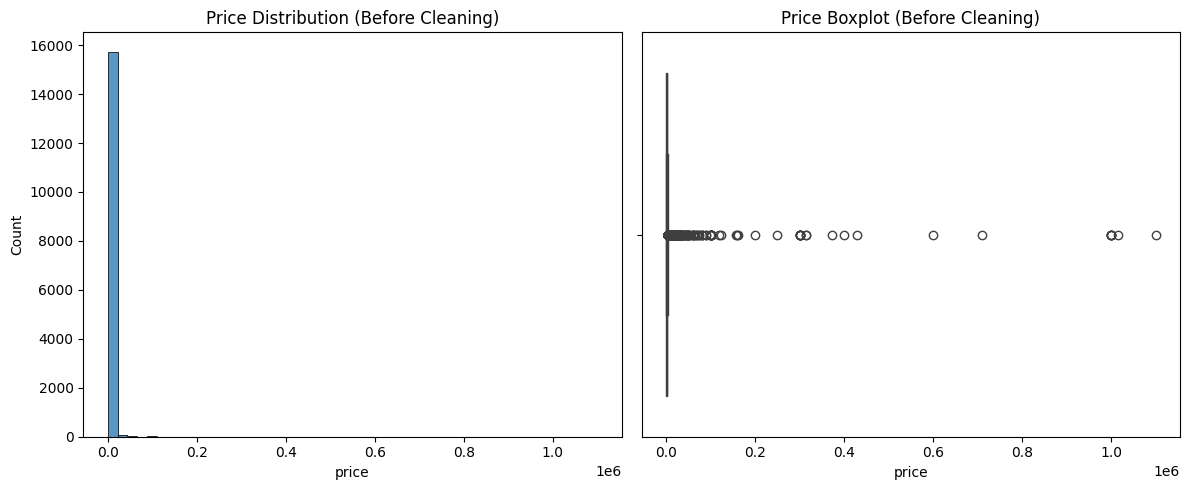

In [35]:
# visualisasi distribusi harga sebelum cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], bins=50)
plt.title("Price Distribution (Before Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['price'])
plt.title("Price Boxplot (Before Cleaning)")

plt.tight_layout()
plt.show()


Mayoritas listing memiliki harga di rentang rendah (di bawah 3.000 Baht), namun terdapat nilai maksimum hingga 1.100.000 Baht yang sangat tidak wajar untuk pasar Airbnb. Selain itu, terdapat listing dengan harga 0 Baht yang jelas tidak mungkin. Nilai ekstrem ini kemungkinan berasal dari kesalahan input atau listing tidak realistis, sehingga outlier pada kolom price perlu ditangani sebelum analisis.

In [36]:
# menghapus outlier pada kolom price menggunakan IQR
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['price'] >= lower) & (df_clean['price'] <= upper)]
df_clean = df_clean[df_clean['price'] > 0]

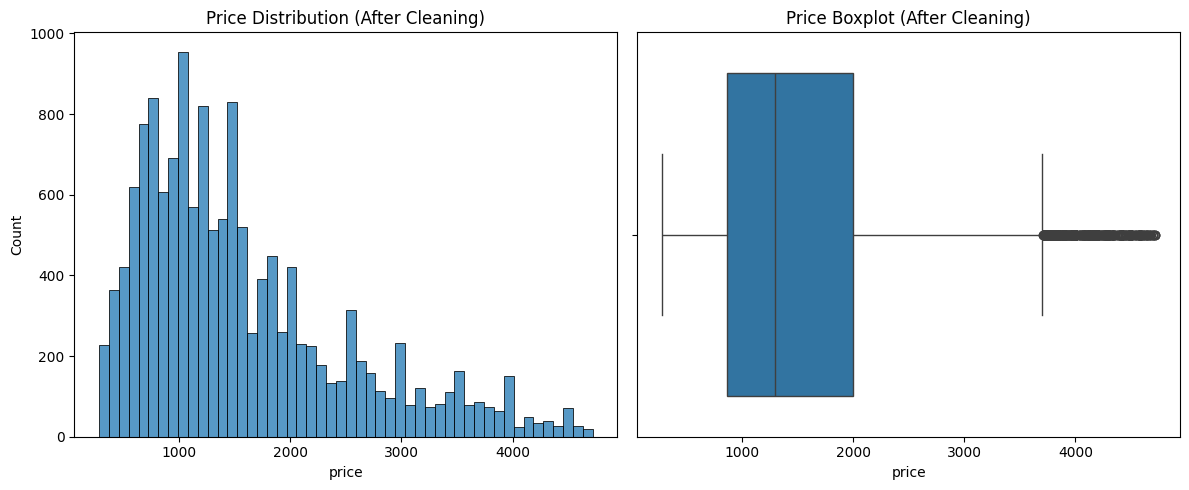

In [37]:
# visualisasi distribusi harga setelah cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], bins=50)
plt.title("Price Distribution (After Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['price'])
plt.title("Price Boxplot (After Cleaning)")

plt.tight_layout()
plt.show()



Setelah pembersihan, distribusi price tampak lebih stabil dan tidak lagi memiliki ekor panjang. Hal ini memastikan analisis korelasi dan perbandingan harga antar lokasi menjadi lebih akurat.

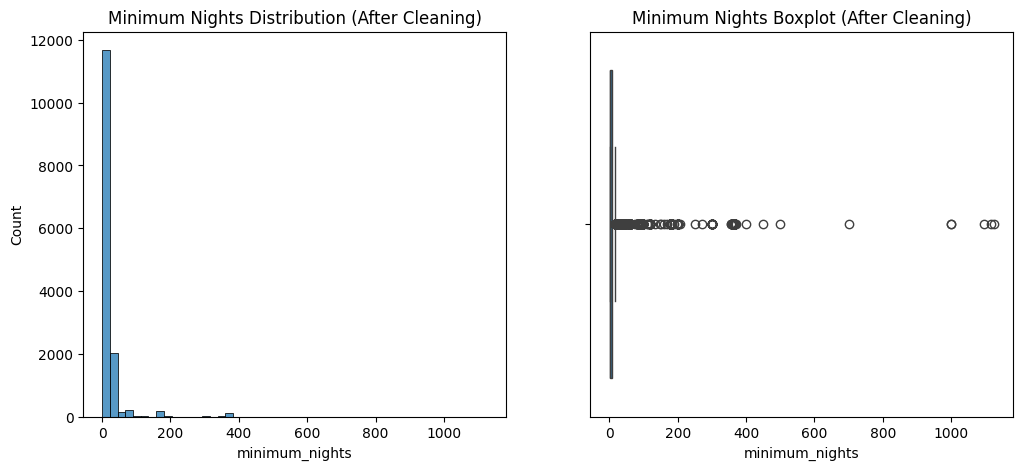

In [38]:
# visualisasi distribusi minimum_nights sebelum cleaning
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_clean['minimum_nights'], bins=50)
plt.title("Minimum Nights Distribution (After Cleaning)")

plt.subplot(1,2,2)
sns.boxplot(x=df_clean['minimum_nights'])
plt.title("Minimum Nights Boxplot (After Cleaning)")

plt.show()



Mayoritas listing hanya mensyaratkan 1–7 malam, namun terdapat nilai maksimum 1125 malam (~3 tahun). Nilai ini tidak realistis sebagai minimum stay Airbnb dan kemungkinan merupakan kesalahan input. Karena itu, outlier harus dihapus.

In [39]:
# menghapus outlier pada kolom minimum_nights menggunakan IQR
Q1_m = df_clean['minimum_nights'].quantile(0.25)
Q3_m = df_clean['minimum_nights'].quantile(0.75)
IQR_m = Q3_m - Q1_m
upper_m = Q3_m + 1.5 * IQR_m

df_clean = df_clean[df_clean['minimum_nights'] <= upper_m]


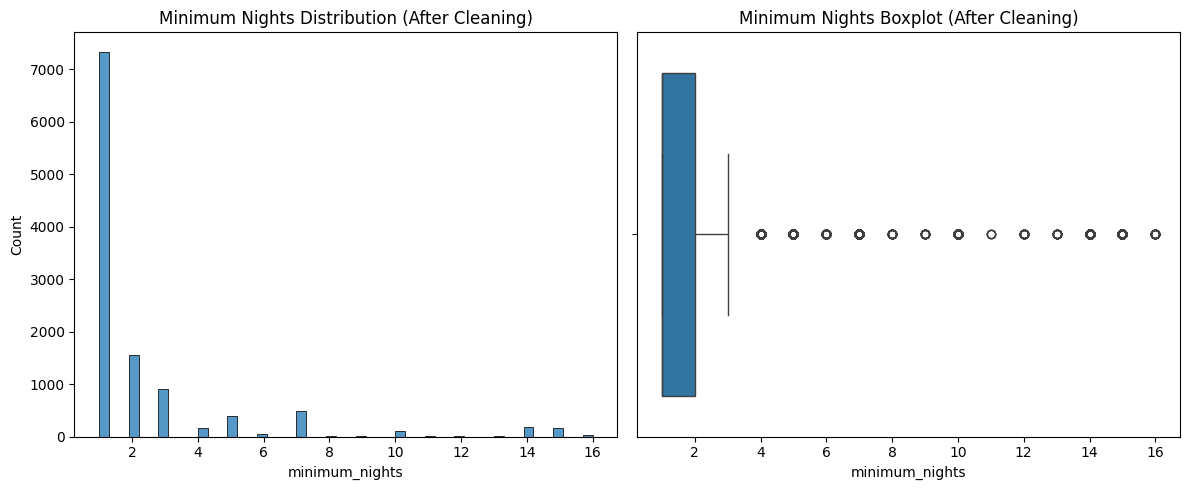

In [40]:
# visualisasi distribusi minimum_nights setelah cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['minimum_nights'], bins=50)
plt.title("Minimum Nights Distribution (After Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['minimum_nights'])
plt.title("Minimum Nights Boxplot (After Cleaning)")

plt.tight_layout()
plt.show()


Setelah outlier ekstrem dihapus, distribusi minimum nights menjadi lebih mencerminkan pola sebenarnya yaitu mayoritas listing membutuhkan 1 hingga 7 malam. Hal ini penting agar analisis performa listing tidak bias akibat nilai ekstrim yang salah input.

saat ini bisa dilihat bahwa distribusi pada kolom `price` sudah lebih representatif dan tidak skewed ekstrem

In [41]:
df_clean.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,dist_city_center,dist_bts_siam,dist_mrt_sukhumvit,dist_grand_palace,dist_chatuchak
count,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000,11442.000000
mean,13.746968,100.559409,1617.566684,2.337703,18.222426,0.582452,245.632844,6.502403,6.452448,6.053350,9.079724,8.629277
std,0.044609,0.053586,971.571181,2.891614,43.796119,1.038309,125.987552,4.893255,4.886964,4.764567,5.465396,4.199286
min,13.527300,100.329550,278.000000,1.000000,0.000000,0.000000,0.000000,0.098502,0.110118,0.025733,0.199833,0.167956
25%,13.720492,100.527623,890.000000,1.000000,0.000000,0.000000,140.000000,3.260419,3.185096,2.698075,5.247529,5.872744
50%,13.739580,100.559845,1375.000000,1.000000,2.000000,0.110000,315.000000,5.028797,4.994848,5.044212,8.182074,8.188675
75%,13.761810,100.585040,2084.500000,2.000000,15.000000,0.810000,360.000000,8.259853,8.195508,7.725883,11.583980,10.531415
max,13.953540,100.923440,4720.000000,16.000000,1224.000000,19.130000,365.000000,42.832912,42.734446,40.268337,47.209276,40.181412


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11442 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                11442 non-null  object  
 1   neighbourhood       11442 non-null  object  
 2   latitude            11442 non-null  float64 
 3   longitude           11442 non-null  float64 
 4   room_type           11442 non-null  category
 5   price               11442 non-null  int64   
 6   minimum_nights      11442 non-null  int64   
 7   number_of_reviews   11442 non-null  int64   
 8   reviews_per_month   11442 non-null  float64 
 9   availability_365    11442 non-null  int64   
 10  location_zone       11442 non-null  object  
 11  dist_city_center    11442 non-null  float64 
 12  dist_bts_siam       11442 non-null  float64 
 13  dist_mrt_sukhumvit  11442 non-null  float64 
 14  dist_grand_palace   11442 non-null  float64 
 15  dist_chatuchak      11442 non-null  float

In [43]:
info_df = pd.DataFrame({
    "Kolom": df_clean.columns,
    "Tipe Data": [df_clean[col].dtype for col in df_clean.columns],
    "Jumlah Non-Null": [df_clean[col].count() for col in df_clean.columns],
    "Jumlah Null": [df_clean[col].isnull().sum() for col in df_clean.columns],
})

# Tampilkan sebagai tabel
info_df

,Kolom,Tipe Data,Jumlah Non-Null,Jumlah Null
0,name,object,11442,0
1,neighbourhood,object,11442,0
2,latitude,float64,11442,0
3,longitude,float64,11442,0
4,room_type,category,11442,0
5,price,int64,11442,0
6,minimum_nights,int64,11442,0
7,number_of_reviews,int64,11442,0
8,reviews_per_month,float64,11442,0
9,availability_365,int64,11442,0


In [44]:
df_clean.columns.tolist()

['name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365',
 'location_zone',
 'dist_city_center',
 'dist_bts_siam',
 'dist_mrt_sukhumvit',
 'dist_grand_palace',
 'dist_chatuchak']

# 8. Export dataset yang sudah bersih

In [45]:
# simpan dataframe yang sudah dibersihkan ke file csv baru
df_clean.to_csv("airbnb_bangkok_clean.csv", index=False, encoding="utf-8")

# 9. Visualisasi Lanjutan

## 9.1. Distribusi Variabel Numerik

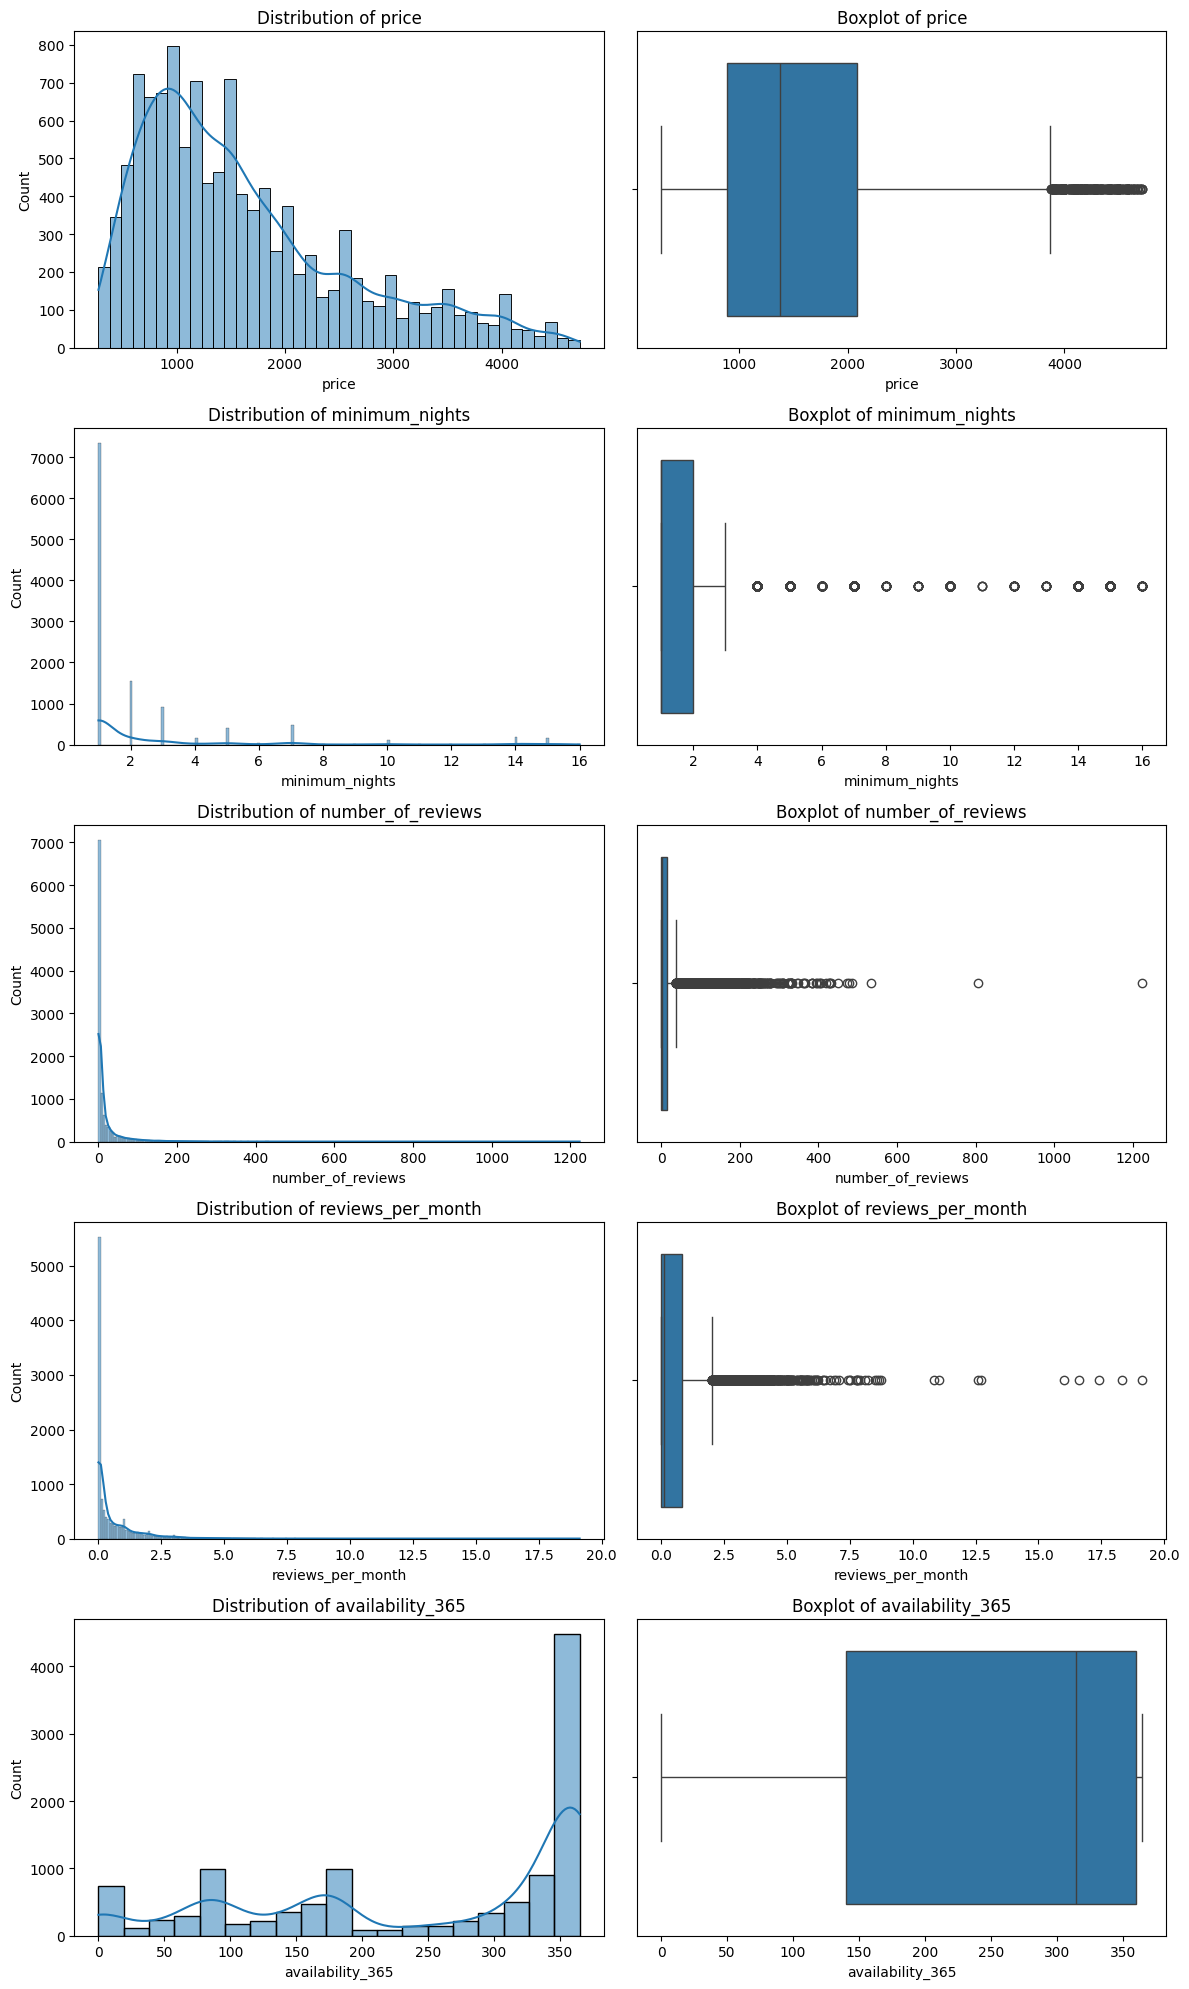

In [46]:
# visualisasi distribusi kolom numerikal setelah cleaning
num_cols = ['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']

fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4 * len(num_cols)))

for i, col in enumerate(num_cols):
    
    sns.histplot(df_clean[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f"Distribution of {col}")

    sns.boxplot(x=df_clean[col], ax=axes[i,1])
    axes[i,1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


disini dilakukan visualisasi distribusi numerik utama seperti `price, minimum_nights, number_of_reviews, reviews_per_month, dan availability_365`. Digunakan Subplot mempermudah pembacaan.

## 9.2. Distribusi Kolom Kategorikal

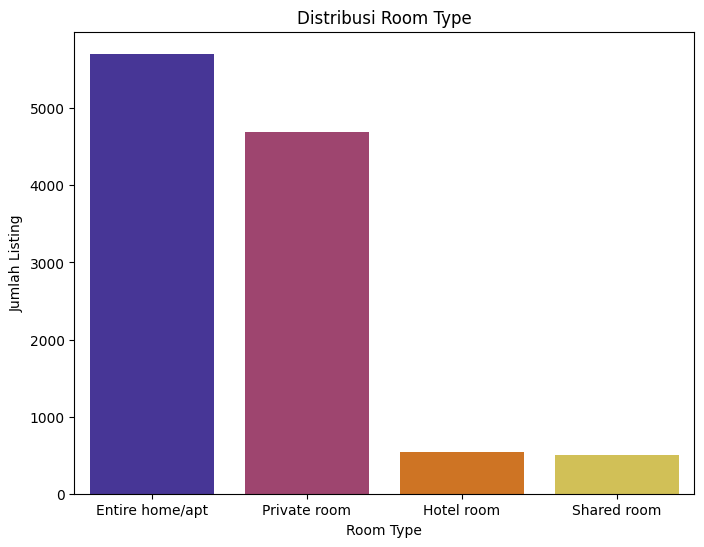

In [47]:
# visualisasi distribusi kolom kategorikal setelah cleaning
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, x='room_type', order=df_clean['room_type'].value_counts().index, palette="CMRmap")
plt.title("Distribusi Room Type")
plt.ylabel("Jumlah Listing")
plt.xlabel("Room Type")
plt.show()

Mayoritas listing adalah properti rumah/apartment.

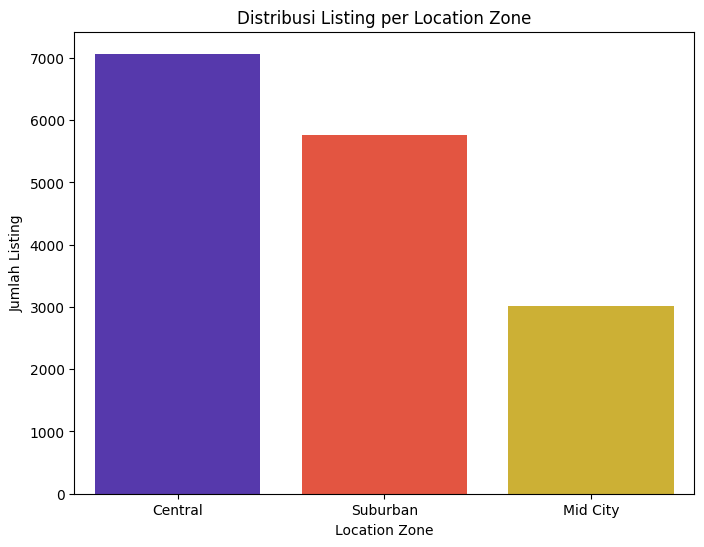

In [48]:
# visualisasi distribusi kolom location_zone 
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='location_zone', order=df['location_zone'].value_counts().index, palette="CMRmap")
plt.title("Distribusi Listing per Location Zone")
plt.ylabel("Jumlah Listing")
plt.xlabel("Location Zone")
plt.show()

Pada zona central memiliki listings yang paling banyak diantara yang lain.

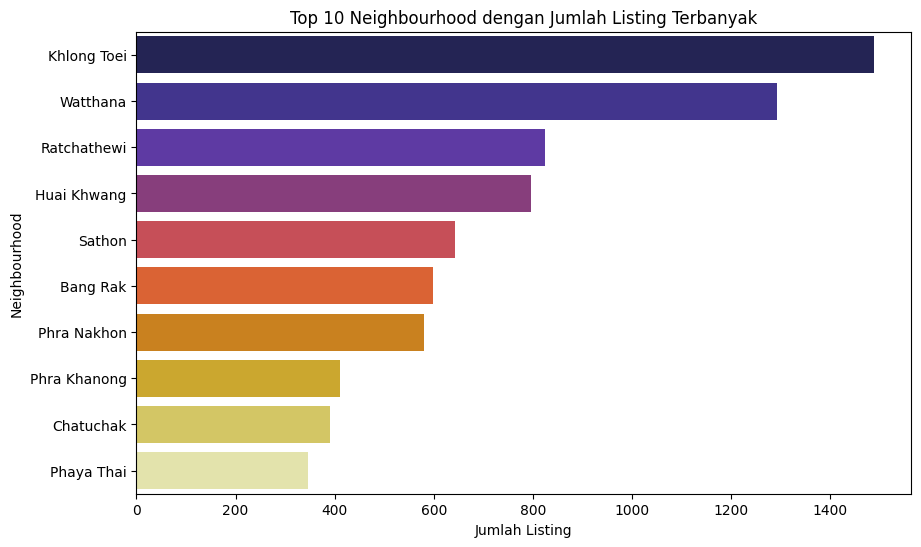

In [49]:
# Hitung jumlah listing per neighbourhood
top10_neighbourhood = df_clean['neighbourhood'].value_counts().head(10)

# Bar plot horizontal
plt.figure(figsize=(10,6))
sns.barplot(x=top10_neighbourhood.values, y=top10_neighbourhood.index, palette="CMRmap")
plt.title("Top 10 Neighbourhood dengan Jumlah Listing Terbanyak")
plt.xlabel("Jumlah Listing")
plt.ylabel("Neighbourhood")
plt.show()

Grafik ini menunjukkan 10 neighbourhood di Bangkok dengan jumlah listing Airbnb terbanyak. Area-area ini merupakan pusat supply, menandakan lokasi paling diminati host untuk menyewakan properti mereka.

## 9.3. Hubungan Jarak 

### 9.3.1 Scatterplot Jarak vs Harga dan Review/Month

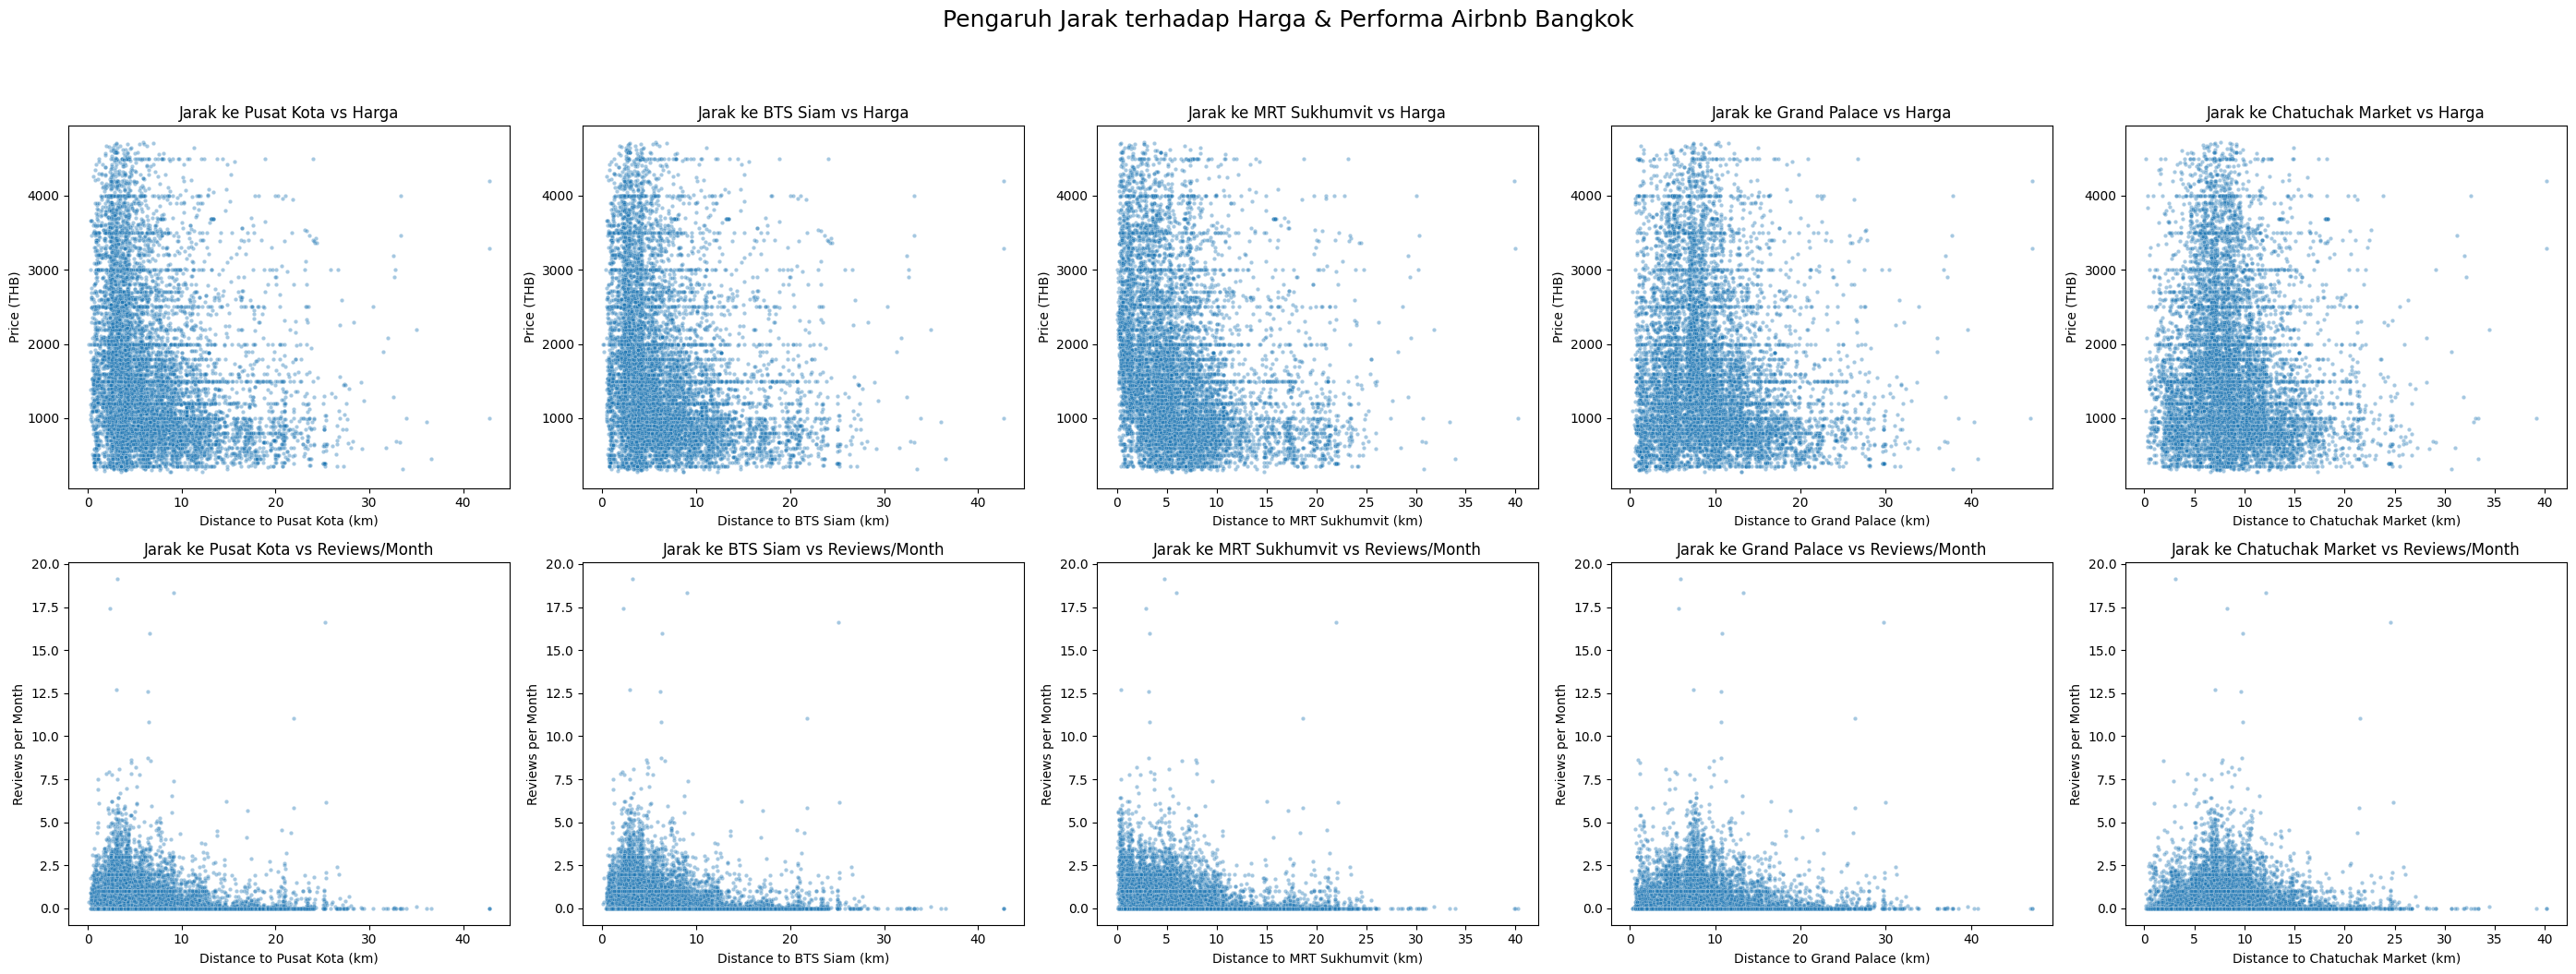

In [50]:
# visualisasi scatterplot jarak ke landmarks vs harga dan reviews_per_month
landmarks = [
    ('dist_city_center', 'Pusat Kota'),
    ('dist_bts_siam', 'BTS Siam'),
    ('dist_mrt_sukhumvit', 'MRT Sukhumvit'),
    ('dist_grand_palace', 'Grand Palace'),
    ('dist_chatuchak', 'Chatuchak Market')
]

fig, axes = plt.subplots(2, 5, figsize=(28, 10))
fig.suptitle("Pengaruh Jarak terhadap Harga & Performa Airbnb Bangkok", fontsize=18, y=1.05)

for i, (col, label) in enumerate(landmarks):

    # Scatter: Jarak vs Harga
    sns.scatterplot(
        x=df_clean[col], 
        y=df_clean['price'], 
        ax=axes[0, i], 
        s=10, alpha=0.4
    )
    axes[0, i].set_title(f"Jarak ke {label} vs Harga")
    axes[0, i].set_xlabel(f"Distance to {label} (km)")
    axes[0, i].set_ylabel("Price (THB)")

    # Scatter: Jarak vs Reviews_per_month
    sns.scatterplot(
        x=df_clean[col], 
        y=df_clean['reviews_per_month'], 
        ax=axes[1, i], 
        s=10, alpha=0.4
    )
    axes[1, i].set_title(f"Jarak ke {label} vs Reviews/Month")
    axes[1, i].set_xlabel(f"Distance to {label} (km)")
    axes[1, i].set_ylabel("Reviews per Month")

plt.tight_layout()
plt.show()

1. Pusat Kota (dist_city_center)  
- Scatter menunjukkan pola menurun: semakin jauh dari pusat kota, harga dan aktivitas (reviews_per_month) cenderung menurun.  
- Spearman biasanya menunjukkan korelasi negatif signifikan.

2. Transportasi Umum  
BTS Siam (dist_bts_siam) dan MRT Sukhumvit (dist_mrt_sukhumvit)   
- Hub transportasi paling penting → harga lebih tinggi semakin dekat ke BTS dan MRT.  
- Listing dekat BTS dan MRT memiliki review rate lebih besar.  

3. Destinasi Wisata
Grand Palace (dist_grand_palace) dan Chatuchak Market (dist_chatuchak)  
- Listing semakin dekat maka harga lebih tinggi & review rate lebih tinggi.  
- Korelasi negatif signifikan.  
- Tetap menunjukkan korelasi negatif terhadap price dan reviews.

## 9.4. Heatmap Korelasi

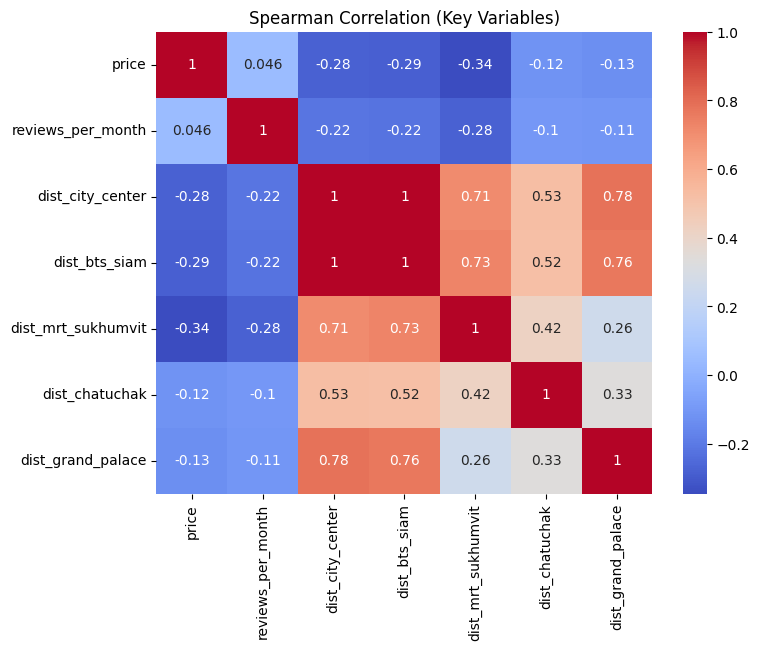

In [51]:
# visualisasi heatmap korelasi spearman jarak ke landmark vs harga dan reviews_per_month
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[[
    'price','reviews_per_month','dist_city_center','dist_bts_siam',
    'dist_mrt_sukhumvit','dist_chatuchak','dist_grand_palace'
]].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Spearman Correlation (Key Variables)")
plt.show()


# 10. Inferential Statistics

Inferential statistics digunakan untuk menguji apakah pola yang terlihat pada EDA benar-benar signifikan secara statistik, bukan hanya kebetulan.
Fokus utama analisis ini:

Apakah jarak landmark berpengaruh signifikan terhadap:
- Price
- Reviews_per_month

## 10.1. Uji Korelasi Spearman

In [52]:
# spearman correlation jarak ke landmarks vs harga dan reviews_per_month
for col, label in landmarks:
    rho_price, p_price = spearmanr(df_clean[col], df_clean['price'])
    rho_rpm, p_rpm = spearmanr(df_clean[col], df_clean['reviews_per_month'])

    print(f"=== Spearman dengan {label} ===")
    print(f"Price vs {col}: rho={rho_price:.3f}, p={p_price:.4f}")
    print(f"Reviews_per_month vs {col}: rho={rho_rpm:.3f}, p={p_rpm:.4f}")
    print()


=== Spearman dengan Pusat Kota ===
Price vs dist_city_center: rho=-0.278, p=0.0000
Reviews_per_month vs dist_city_center: rho=-0.217, p=0.0000

=== Spearman dengan BTS Siam ===
Price vs dist_bts_siam: rho=-0.286, p=0.0000
Reviews_per_month vs dist_bts_siam: rho=-0.223, p=0.0000

=== Spearman dengan MRT Sukhumvit ===
Price vs dist_mrt_sukhumvit: rho=-0.345, p=0.0000
Reviews_per_month vs dist_mrt_sukhumvit: rho=-0.277, p=0.0000

=== Spearman dengan Grand Palace ===
Price vs dist_grand_palace: rho=-0.131, p=0.0000
Reviews_per_month vs dist_grand_palace: rho=-0.108, p=0.0000

=== Spearman dengan Chatuchak Market ===
Price vs dist_chatuchak: rho=-0.116, p=0.0000
Reviews_per_month vs dist_chatuchak: rho=-0.102, p=0.0000



1. Harga Airbnb di Bangkok paling dipengaruhi oleh jarak ke pusat transportasi modern (MRT/BTS), bukan ke landmark wisata. Dapat diilihat dari korelasi yang negatif terbesar besar dari landmark wisata.
2. Review-per-month (proxy demand/occupancy) juga paling dipengaruhi oleh akses MRT/BTS, bukan landmark.

# 11. Kesimpulan

1. Lokasi adalah faktor paling kuat yang mempengaruhi harga dan permintaan (reviews_per_month).
2. Transportasi modern (MRT Sukhumvit & BTS Siam) memiliki pengaruh lebih besar terhadap performa listing dibanding kedekatan ke landmark wisata seperti Grand Palace atau Chatuchak.
3. Listing yang lebih dekat ke MRT Sukhumvit memiliki:
    - Harga lebih tinggi
    - Review per month lebih tinggi (indikasi demand & occupancy lebih baik)
4. Landmark wisata berpengaruh sangat kecil (rho < 0.13) sehingga tidak relevan sebagai faktor utama pricing atau demand.
5. Pasar Airbnb Bangkok lebih sensitif terhadap aksesibilitas (mobility) dibanding sightseeing proximity.

# 12. Actionable Recommendations

1. Prioritaskan Listing di Dekat MRT/BTS  
Listing yang berlokasi <1 km dari MRT Sukhumvit atau BTS Siam terbukti memiliki harga dan performa terbaik. Fokuskan ekspansi, promosi, dan peningkatan kualitas listing di area ini.

2. Terapkan Pricing Berdasarkan Jarak  
Gunakan skema harga bertingkat (premium – standard – value) berdasarkan jarak ke transportasi umum. Ini faktor paling kuat mempengaruhi willingness-to-pay tamu.

3. Berikan Promosi untuk Listing yang Jauh dari Akses Transportasi  
Listing yang jauh dari pusat kota atau stasiun transportasi umum memerlukan strategi boosting seperti diskon long-stay, peningkatan fasilitas, layanan antar-jemput.

4. Tonjolkan Akses Transportasi dalam Marketing  
Judul dan deskripsi listing harus secara eksplisit menonjolkan akses transportasi seperti contoh “Near MRT Sukhumvit”, “5 minutes walk to BTS”, “Easy city access” ini lebih efektif dibanding menyebut landmark wisata.